This notebook is a simple introduction to pytorch, assuming you already know  python, numpy and the notebooks. PyTorch is a python module dedicated to deep-learning. Everything is based on a specific data structure: the tensor. 

Machine learning basically relies on three components: 
- the model: in this course this is a Neural Network and in pytorch a **module**
- the model is trained to minimize a **loss** function
- this minization can be achieved with gradient descent (or one of its variant) with an **optimizer**. 
In this notbook we will introduce these 3 components and also the basic data structure (the tensors). 


To start with pytorch, here are some external websites: 
- http://pytorch.org/tutorials/ : official tutorials
- http://pytorch.org/docs/master/ : official documentation

Before, check the version of pytorch

In [2]:
import torch as th
print(th.__version__)
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np

2.0.0+cpu


You should have a version of at least 1.0.0. 

You should have a version of at least 1.0.0. 
# Pytorch overview

## Tensor  overview
For users who are familiar with numpy arrays, the PyTorch **Tensor** class is very similar. PyTorch is like NumPy, but with GPU acceleration and automatic computation of gradients. This  makes it suitable for deep learning: calculating backward pass data automatically starting from a forward expression.

The forward pass is implemented as a computation graph. The **Tensor** is the basic piece of this computation graph, to encode the data (input/output) and the parameters of the model. 
A Tensor is both a tensor (like a numpy array or a matlab matrix) and a variable (or a node) of the computation graph. A Tensor can store data and the associated gradients.



**IMPORTANT NOTE: ** Since torch 0.3, a **Tensor** is a **Variable** that wraps a tensor. Before these 2 concepts were separated. 

## Module overview

A module is a part of a NNet. It may contains Tensors. The core PyTorch modules for building neural networks are located in *torch.nn*, which provides common neural network layers and other architectural components. Fully connected layers, convolutional layers, activation functions, and loss functions can all be found here. Modules can be seen as pre-built pieces of computation graph. 

A simple example of *module* is `Linear`: it's a fully connected layer, so a linear transformation of the input. It contains a matrix of parameters (a Tensor). Activation function are also `Module`. You can therefore create a cascade of `Linear` module with a `Sigmoid`, for example. 

A special kind of module is a *container* : a module that contains other module. The most widely used is `Sequential`: it's a container to implement a feed-forward network. When you create a `Sequential` object you pass him an ordered list of modules to create the cascade of operation. 


## Gradient computation and optimization
To learn the model, we need to things: 
- Compute the gradient of the loss with respect to the parameters. The gradients are computed via auto-differentiation. This is the role of the **backward** function.  
- Update the parameters, with these gradient values. This is the role of the **optimizer**. The optimizer is an object that manage the gradient descent updates. 


# Tensor

To start with  *Tensor*s, read this link first :
http://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html. 
and then look at the operations on tensors:  http://pytorch.org/docs/master/torch.html. 

## Basics
Now, you can answer the following questions: 
* Build a tensor of dimensions (2,3) filled with integers from 1  to 6. 
* Convert this  Tensor in array numpy and back. 
* Compute the sum of its elements, the sum per rows and per columns. 
* Build a tensor of dimensions (3,2) filled with random numbers. Numbers are drawn from the uniform distribution on [0,1]
* Same with a gaussian  (mean=0, variance=1). 

Remember, you can use ask for help, like in the following cell. 
But in most of the case it is easier to use the online documentation of the function: https://pytorch.org/docs/stable/torch.html#torch.arange

In [2]:
# A hint 
help(th.arange)


Help on built-in function arange in module torch:

arange(...)
    arange(start=0, end, step=1, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a 1-D tensor of size :math:`\left\lceil \frac{\text{end} - \text{start}}{\text{step}} \right\rceil`
    with values from the interval ``[start, end)`` taken with common difference
    :attr:`step` beginning from `start`.
    
    Note that non-integer :attr:`step` is subject to floating point rounding errors when
    comparing against :attr:`end`; to avoid inconsistency, we advise adding a small epsilon to :attr:`end`
    in such cases.
    
    .. math::
        \text{out}_{{i+1}} = \text{out}_{i} + \text{step}
    
    Args:
        start (Number): the starting value for the set of points. Default: ``0``.
        end (Number): the ending value for the set of points
        step (Number): the gap between each pair of adjacent points. Default: ``1``.
    
    Keyword args:
        out 

In [3]:
A = th.arange(1,7)  # Building of a 1-D tensor with integers from 1 to 6
A = th.reshape(A,(2,3))  # Reshaping that tensor in the wanted dimensions
print(A)
print(type(A),'A is a tensor for now')
A = np.array(A)  # np.array can take a tensor as an imput
print(type(A),"Now it's an array")
A = th.from_numpy(A)  # th.from_numpy is made to convert an array into a tensor
print(type(A),"And it's back to a tensor")
print("Here is the sum of all A's elements :",int(th.sum(A)))  # th.sum computes the sum of all elements
print("Here is the sum of A's elements per rows:",th.sum(A,1))  # unless we specify on which dimension to do the operation
print("Here is the sum of A's elements per columns:",th.sum(A,0))

B = th.rand(3,2)  # th.rand uses the uniform distribution on [0,1] to create a tensor of specified size
print('Here is a tensor of dimensions (3,2) with random values across the uniform distribution on [0,1] :\n',B)

C = th.randn(3,2) # th.randn uses the standard normal distribution to create a tensor of specified size
print('Here is a tensor of dimensions (3,2) with random values across the normal distribution of mean 0 and std 1 :\n',C)

# We can also use normal to use any (and different) normal distributions but that implies creating tensors with the wanted means and std
means = th.zeros(3,2)
std = th.ones(3,2)
D = th.normal(means,std)
print("Here is another one with a different and more general method :\n",D)

tensor([[1, 2, 3],
        [4, 5, 6]])
<class 'torch.Tensor'> A is a tensor for now
<class 'numpy.ndarray'> Now it's an array
<class 'torch.Tensor'> And it's back to a tensor
Here is the sum of all A's elements : 21
Here is the sum of A's elements per rows: tensor([ 6, 15])
Here is the sum of A's elements per columns: tensor([5, 7, 9])
Here is a tensor of dimensions (3,2) with random values across the uniform distribution on [0,1] :
 tensor([[0.0400, 0.8567],
        [0.3991, 0.0075],
        [0.4269, 0.5451]])
Here is a tensor of dimensions (3,2) with random values across the normal distribution of mean 0 and std 1 :
 tensor([[ 0.4181, -0.8010],
        [ 0.9245,  1.9269],
        [ 0.1529, -0.2647]])
Here is another one with a different and more general method :
 tensor([[-0.4060,  1.2351],
        [ 0.5838,  1.5487],
        [ 0.3991, -1.4488]])


## Operation and access

* Extract the first row and the last row (do the same with columns)
* Build a matrix  A of dimension (2,3), a matrix  B (2,1) et and  C (1,4) with random initialisation. 
* Concatenate A with B, and add the results with C. 
* Create A (5,4), then B (3,4) which contains in this order: the second, the first and the fourth row of A. 

In [4]:
ex = th.arange(1,7)
ex = th.reshape(ex,(2,3))
print("Here is the used tensor for the first point \n:",ex)
print("Here are the first and last row \n:",ex[0,:],ex[1,:])
print("Here are the first and last columns \n:",ex[:,0],ex[:,2])

# Let's initialize A, B and C using rand
A = th.rand(2,3)
print('A:',A)
B = th.rand(2,1)
print('B:',B)
C = th.rand(1,4)
print('C:',C)
D = th.cat((A,B),1) + C # th.cat and it's aliases are used to concatenate

print("Here is the addition of C and the concatenation of A and B :\n",D)

# We can create B using stack (or cat) on A:
A = th.rand(5,4)
B = th.stack((A[1],A[0],A[3]))
print("Here is A and B created using stack:\n",A,"\n",B)
C = th.reshape(th.cat([A[1],A[0],A[3]]),(3,4))
print("Here is C (the same as B) created using cat :\n",C)

Here is the used tensor for the first point 
: tensor([[1, 2, 3],
        [4, 5, 6]])
Here are the first and last row 
: tensor([1, 2, 3]) tensor([4, 5, 6])
Here are the first and last columns 
: tensor([1, 4]) tensor([3, 6])
A: tensor([[0.0204, 0.8602, 0.9199],
        [0.2300, 0.9014, 0.2686]])
B: tensor([[0.5708],
        [0.3212]])
C: tensor([[0.1181, 0.3285, 0.2336, 0.3820]])
Here is the addition of C and the concatenation of A and B :
 tensor([[0.1385, 1.1887, 1.1536, 0.9528],
        [0.3481, 1.2299, 0.5023, 0.7032]])
Here is A and B created using stack:
 tensor([[0.5443, 0.6692, 0.5534, 0.4034],
        [0.5526, 0.4229, 0.3933, 0.7589],
        [0.0909, 0.7605, 0.3559, 0.3401],
        [0.7093, 0.8437, 0.8334, 0.6120],
        [0.3392, 0.6649, 0.3150, 0.2021]]) 
 tensor([[0.5526, 0.4229, 0.3933, 0.7589],
        [0.5443, 0.6692, 0.5534, 0.4034],
        [0.7093, 0.8437, 0.8334, 0.6120]])
Here is C (the same as B) created using cat :
 tensor([[0.5526, 0.4229, 0.3933, 0.7589],
  

Look at the following code and how  x2 is built from x. 

In [5]:
x = th.randn(5, 4)
print(x)

x2= th.stack((x,x) , dim=0)
print (x2[0]) 
print (x2.size()) 

x2= th.stack((x,x) , dim=1)
print (x2[0]) 
print (x2.size()) 

x2= th.stack((x,x) , dim=2)
print (x2[0]) 
print (x2.size())


tensor([[ 0.9479, -0.7184, -1.9556, -1.1039],
        [ 0.4317,  0.5361,  0.5794,  1.0979],
        [ 0.7363,  0.1234,  2.5965, -0.6569],
        [ 0.2294,  1.1904,  1.4517, -1.7521],
        [-0.4032,  1.3665,  0.3034,  0.9891]])
tensor([[ 0.9479, -0.7184, -1.9556, -1.1039],
        [ 0.4317,  0.5361,  0.5794,  1.0979],
        [ 0.7363,  0.1234,  2.5965, -0.6569],
        [ 0.2294,  1.1904,  1.4517, -1.7521],
        [-0.4032,  1.3665,  0.3034,  0.9891]])
torch.Size([2, 5, 4])
tensor([[ 0.9479, -0.7184, -1.9556, -1.1039],
        [ 0.9479, -0.7184, -1.9556, -1.1039]])
torch.Size([5, 2, 4])
tensor([[ 0.9479,  0.9479],
        [-0.7184, -0.7184],
        [-1.9556, -1.9556],
        [-1.1039, -1.1039]])
torch.Size([5, 4, 2])


## Reshape and squeeze

The method **view()** is similar to *reshape*. This is **important** since with neural net, you will often need to play with dimensions. 

* Build a tensor of size (2, 3, 4)
* Convert it in a matrix of dimension (3,8) and (2,12)
* What does  *view(2,-1)*  do ? 

In [6]:
A = th.randn(2,3,4)
# B is of size (3,8)
B = A.view(3,8)
C = A.view(2,12)
print(B.size(),C.size())
C = A.view(2,-1)
print(C.size())

# view() is a method that reshapes the tensor into the wanted dimensions. The parameter -1 is a bit special:
# It means that we don't know how many rows or columns we want (here columns) but we are sure about the other one.
# That way we have the right numbers of rows and a number of columns that allows it.

torch.Size([3, 8]) torch.Size([2, 12])
torch.Size([2, 12])


Assume you have a Tensor A of dimensions (3,2,1) that you initialized as you want:
- look at the documentation of the method **squeeze**
- Try it on A
- And do the reverse with unsqueeze

In [7]:
A = th.randn(3,2,1)
print("voici A :\n",A)
B = th.squeeze(A)
print("Et voici ce que donne squeeze(A) :\n",B)
print("\n On enlève toute les dimensions de taille 1, On peut aussi le faire uniquement selon une ou des dimensions\n")

C = th.unsqueeze(B,2) # On peut rajouter une dimension de 1 là où l'on souhaite avec unsqueeze
print(C.size())


voici A :
 tensor([[[ 0.7108],
         [ 1.2947]],

        [[ 0.1244],
         [ 0.9743]],

        [[ 1.1540],
         [-0.3615]]])
Et voici ce que donne squeeze(A) :
 tensor([[ 0.7108,  1.2947],
        [ 0.1244,  0.9743],
        [ 1.1540, -0.3615]])

 On enlève toute les dimensions de taille 1, On peut aussi le faire uniquement selon une ou des dimensions

torch.Size([3, 2, 1])


# Automatic differentiation  (auto-grad)

`torch.autograd` provides classes and functions implementing automatic differentiation. 
When a tensor is created with `requires_grad=True`, the object will be able to store information about the gradient. In the following example, we build a computational graph. The "end" of this graph must be a scalar for automatic differentiation. Look at the following code. 



In [8]:
x = th.randn(1, 1, requires_grad=True)
print("x:",x)
print("x.grad:",x.grad)



x: tensor([[1.5455]], requires_grad=True)
x.grad: None


The Tensor `x` has an attribute `grad`. It is set to None for the moment.
To build a computational graph using `x`, we just need to create new variables using torch operation.  The function `backward` can be called on a Tensor that contains a scalar. It computes the gradient (the partial derivatives) of the this scalar value with respect to all the Tensors involved in the computation. Look at the following code:

In [9]:
y = 2*x + 1
print(y)
y.backward()
print(x.grad)

tensor([[4.0909]], grad_fn=<AddBackward0>)
tensor([[2.]])


Can you explain the result ? 

Since we used x to create y (y = 2*x +1), when we use y.backward() the grad of x becomes that 2. If we do that again we add 2 to the value of x.grad.

The computation graph can be of course deeper. For instance, we can introduce a new variable `w`, a tensor as well. 

In [10]:
w = th.randn(1,1, requires_grad=True)
x = th.randn(1, 1, requires_grad=True)

print("w=",w.item()," and x=",x.item())

w= 0.9885735511779785  and x= -0.5705082416534424


In [11]:
z = w*x
z.backward()
print(x.grad)
print(w.grad)

tensor([[0.9886]])
tensor([[-0.5705]])


What do you think about the result ? 

Here, the value of x.grad is w and the value of w.grad is x. Since z is defined by z = w*x , it makes sense.

It is worth noticing that the gradient is a tensor operation on a scalar value: we compute the partial derivative of a scalar quantity w.r.t a tensor. The variable on which we run the backward must be a single value. 

Let us consider the following code: can you explain the results ? 

In [12]:
x = th.randn(2,2,requires_grad=True)        # x is a square matrix
print(x)
out = 0.5*x.pow(2).sum() # out is a new variable (scalar)
print(out)
out.backward()           # back propagation in the graph
print("g:",x.grad)       # the gradient of out with respect to x 
print("x:",x)            # A simple check. Is it what expected ?  
print('are x and x.grad the same?',(x == x.grad).all())

tensor([[ 0.1712,  0.5035],
        [ 1.3287, -1.5682]], requires_grad=True)
tensor(2.2539, grad_fn=<MulBackward0>)
g: tensor([[ 0.1712,  0.5035],
        [ 1.3287, -1.5682]])
x: tensor([[ 0.1712,  0.5035],
        [ 1.3287, -1.5682]], requires_grad=True)
are x and x.grad the same? tensor(True)


Here we compute out that is equal to 1/2 times the values of x squared summed.

That gives us a scalar, we then use the backwards method on out.

The grad of x is equal to x because the dérivative of 1/2 * x² is x.

And for this example  ? 

In [13]:
x = th.randn(2,2,requires_grad=True)        # x is a square matrix
print(x)
w = th.ones(1,2,requires_grad=True)
print(w)
print(w@x)
out = 0.5*(w@x).pow(2).sum() # out is a new variable (scalar)
out.backward()           # back propagation in the graph
print("x:",x)            
print("x.grad:",x.grad)  # the gradient of out with respect to x 
print("w:",w)            
print("w.grad:",w.grad)  # the gradient of out with respect to w

tensor([[1.0743, 2.1756],
        [1.8648, 0.3833]], requires_grad=True)
tensor([[1., 1.]], requires_grad=True)
tensor([[2.9391, 2.5589]], grad_fn=<MmBackward0>)
x: tensor([[1.0743, 2.1756],
        [1.8648, 0.3833]], requires_grad=True)
x.grad: tensor([[2.9391, 2.5589],
        [2.9391, 2.5589]])
w: tensor([[1., 1.]], requires_grad=True)
w.grad: tensor([[8.7246, 6.4614]])


We compute a value out again but here with w@x which is just a (1,2) tensor with values equal to the sums of x columns. we us backwards on it.

x.grad is that tensor w@x two times.

# Machine Learning (or linear regression with gradient descent)

In this section we consider a synthetic problem of regression. The data are generated like this: 

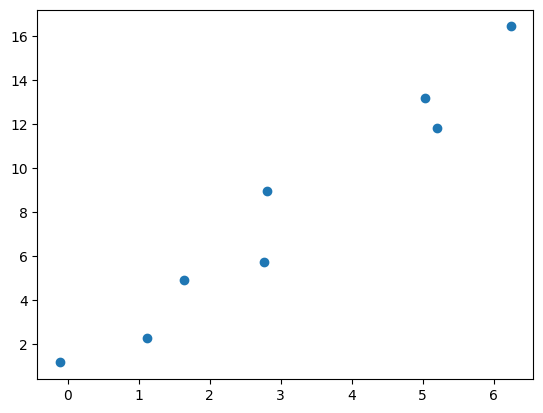

In [3]:
th.manual_seed(123) # to ensure reproducibility
var= 1 # 
X = th.arange(8) + th.randn(8)/var
Y = 2*(th.arange(8) + th.randn(8)/var) + 0.5 
# 
_ = plt.scatter(X,Y)

Our goal is to approximate this simple data set with a function $f$ such that 
$$
y_i \approx f(x_i)
$$ 
To find the right set of parameters that defines $f$, we want to minimize the mean square error:
$$ L = \sum_i (f(x_i) - y_i)^2.$$
Our first assumption is that $f$ is a linear function: 
$$ f(x) = wx+w_0.$$

The optimization program (or the gradient descent) starts with the random initialization of  the parameters $(w,w_0)$ 

In [50]:
w = th.randn(1,requires_grad=True)
w0= th.randn(1,requires_grad=True)

If we plot the line and the training points, this is not good (or you are very lucky):

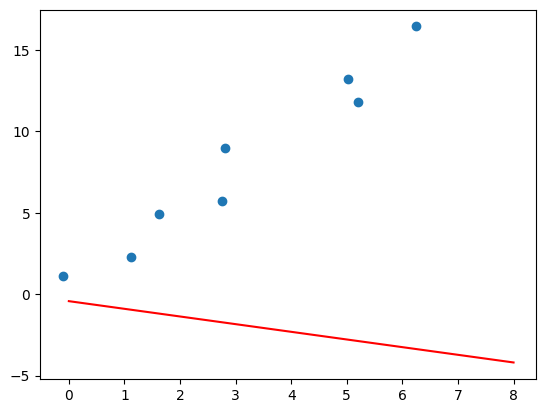

In [51]:
xs = th.linspace(0,8,2) # need 2 points for a line
plt.plot(xs,(w*xs+w0).detach(),'r')
plt.scatter(X,Y)


**TODO**: To quantify the poor quality of this random initialization, compute the loss function. 

In [17]:
def loss(X,Y,w,w0):
    return sum((w*X + w0 -Y).pow(2))

loss(X,Y,w,w0)

tensor(872.9790, grad_fn=<AddBackward0>)

**TODO:** Use the `backward` function to get the gradient of the loss with respect to the parameters. 
- Print the gradients.
- Propose an update of the parameters 
- Verify if it improves the loss function

In [18]:
L = loss(X,Y,w,w0)
print(L)
learning_rate = 1/100000 # we implement a learning rate 
L.backward()
print(w.grad)
print(w0.grad)
w1 = w - w.grad * learning_rate
w2 = w0 - w0.grad * learning_rate  
print(loss(X,Y,w1,w2)) # We succesfully lowered the mean square error

tensor(872.9790, grad_fn=<AddBackward0>)
tensor([-616.5026])
tensor([-145.1270])
tensor(868.9723, grad_fn=<AddBackward0>)


# Optimizer 

The optimizer is an object that takes care of the parameter updates. The base class is `Optimizer` and the code is in the module `torch.optim`. Among the possible optimizer you can look at the documentation of `SGD`:

**TODO:** 
- Explain the parameters `lr`;
- `weight_decay`;

`lr` is the learning rate. <br>
`weight_decay` is a way to introduce a L2 Regularization.

In the future, you will also use `Adam`, but for the moment we focus on `SGD`.  
They all have the same (more or less) the same interface. 
To create an optimizer we need to create an object `SGD` with: 
- the parameters under consideration
- and the lr parameter. 

Assume here we want to learn `w` and `w0`: 

In [49]:
w = th.randn(1,requires_grad=True)
w0= th.randn(1,requires_grad=True)
trainable_parameters = (w,w0)
sgd = th.optim.SGD(trainable_parameters, lr=1)

The two important functions are: 
- `step` take the gradient of all the trainable parameters and make the update (remember we now have values for `w.grad` and `w0.grad`)
- and `zero_grad` resets the gradient values for a next training step.  

**TODO:**
- Compute the predicions for `X`
- Do the backward propagation and print `w,w0` with their gradients
- Make an update  and print `w,w0` with their gradients
- Run `zero_grad`  and print `w,w0` with their gradients
- Plot the new line defined by `w,w0`. 
- Do you think the value of `lr` is adapted ? 

tensor([-0.4709], requires_grad=True) tensor([-689.6369])
tensor([-0.4269], requires_grad=True) tensor([-159.1206])
tensor([689.1660], requires_grad=True) tensor([-689.6369])
tensor([158.6937], requires_grad=True) tensor([-159.1206])
tensor([689.1660], requires_grad=True) None
tensor([158.6937], requires_grad=True) None


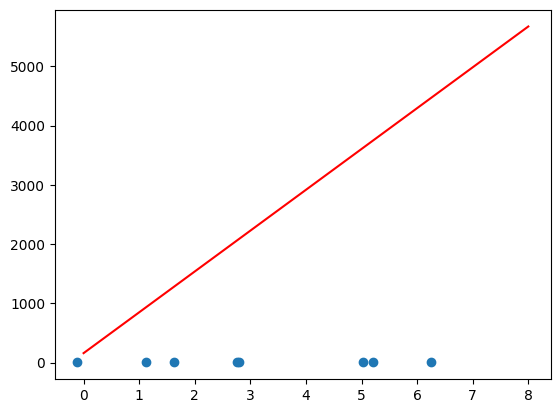

In [20]:
y_pred = w*X + w0
L = sum((y_pred-Y).pow(2))
L.backward()
print(w,w.grad)
print(w0,w0.grad)
# update:
sgd.step()
print(w,w.grad)
print(w0,w0.grad)
sgd.zero_grad()
print(w,w.grad)
print(w0,w0.grad)

# plot
xs = th.linspace(0,8,2)
plt.plot(xs,(w*xs+w0).detach(),'r')
plt.scatter(X,Y)


# The learning rate here is absolutely not adapted, it is way too big for our purpose.

# The training function

**TODO:***
Now you have everything to write the training code of the model:
- initialization of the parameters 
- loop of gradient descent
- record the loss evolution after each epoch
- plot the loss evolution along the training process
- look at the new decision boundary


Text(0.5, 1.0, 'linear regression after 1000 steps')

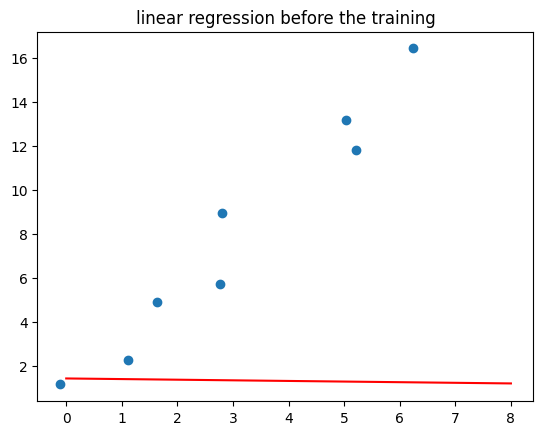

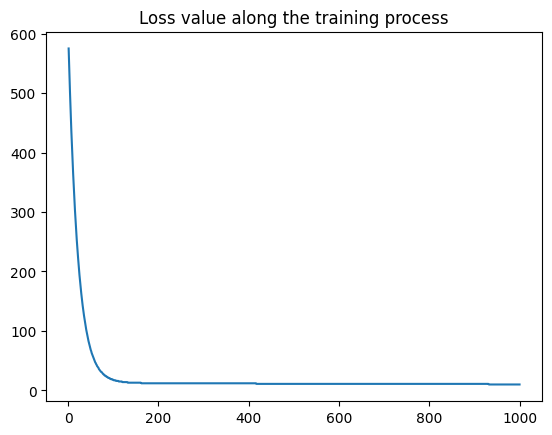

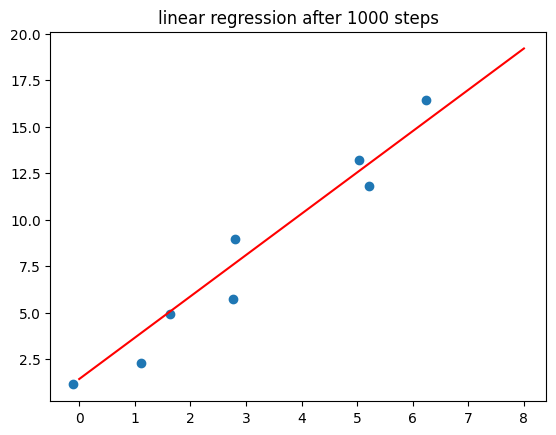

In [21]:
Nepoch = 1000
lr = 1e-4
w = th.randn(1,requires_grad=True)
w0= th.randn(1,requires_grad=True)
trainable_parameters = (w,w0)
sgd = th.optim.SGD(trainable_parameters, lr=lr)
plt.figure(0)
xs = th.linspace(0,8,2)
plt.plot(xs,(w*xs+w0).detach(),'r')
plt.scatter(X,Y)
plt.title('linear regression before the training')


## Your code here 
Losses = []
for i in range(Nepoch):
    y_pred = w*X + w0
    L = sum((y_pred-Y).pow(2))
    Losses.append(int(L))
    L.backward()
    sgd.step()
    sgd.zero_grad()

plt.figure(1)
plt.plot(np.arange(1,len(Losses)+1),Losses)
plt.title('Loss value along the training process')
plt.figure(2)
xs = th.linspace(0,8,2)
plt.plot(xs,(w*xs+w0).detach(),'r')
plt.scatter(X,Y)
plt.title('linear regression after %i steps' %Nepoch)



# Module
In the previous code we define our model "by hand". In practice, it is more convenient to use existing module (base class `Module`). For instance the linear transform $f(x) = wx+w_0$ is simply the application of a `Linear` module. 

**TODO**
- Look at the documentation
- rewrite the training code to use a `Linear` module. 
- Look at the result. 

Text(0.5, 1.0, 'linear regression after 1000 steps')

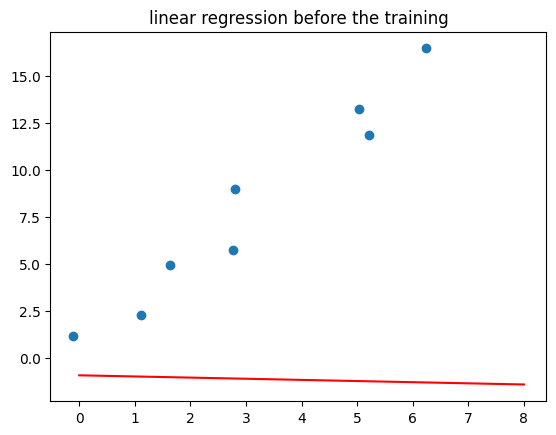

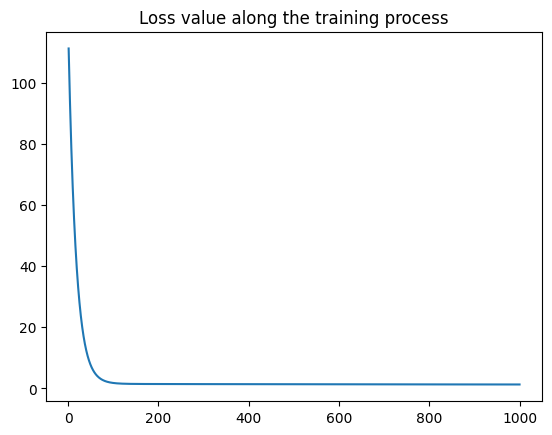

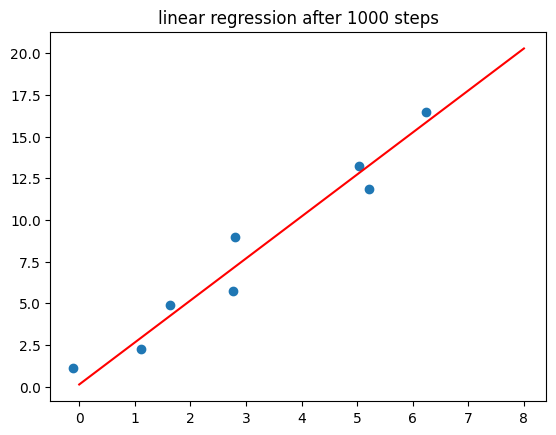

In [23]:
class LinReg(th.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinReg,self).__init__()
        self.linear = th.nn.Linear(input_dim,output_dim)
    def forward(self,X):
        outputs = self.linear(X)
        return outputs
    
learning_rate = 0.001

model = LinReg(1,1)
loss = nn.MSELoss()
opti = th.optim.SGD(model.parameters(),lr = learning_rate)


plt.figure(0)
xs = th.linspace(0,8,2).unsqueeze(1)
plt.plot(xs,(model(xs)).detach(),'r')
plt.scatter(X,Y)
plt.title('linear regression before the training')


Nepoch = 1000
losses = np.zeros(Nepoch)
for i in range(Nepoch):
    L = loss(model(X.unsqueeze(1)),Y.unsqueeze(1))
    losses[i] = L
    model.zero_grad()
    L.backward()
    opti.step()

plt.figure(1)
plt.plot(np.arange(1,len(losses)+1),losses)
plt.title('Loss value along the training process')

plt.figure(2)
xs = th.linspace(0,8,2).unsqueeze(1)
plt.plot(xs,(model(xs)).detach(),'r')
plt.scatter(X,Y)
plt.title('linear regression after %i steps' %Nepoch)


# Logistic Regression
Let start with an easy dataset for binary classification. The following subsections just provide a dummy dataset and function to visualize the data-set. 



## Create the data


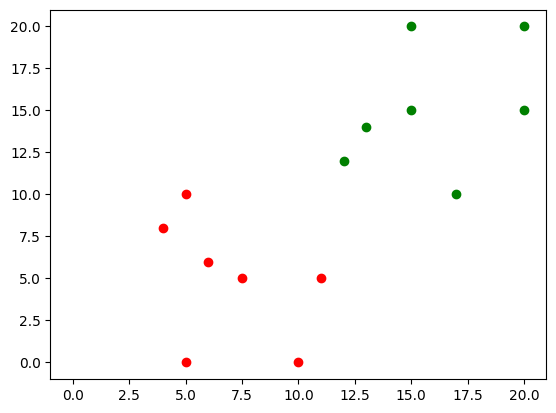

In [27]:
import numpy as np
ST1 = np.array([[17.0 ,12 ,13 ,15 ,15 ,20 ,20],[ 10 ,12 ,14 ,15 ,20 ,15 ,20]]) # class 1 
ST2 = np.array([4, 7.5, 10 ,11, 5 ,5 ,6, 8, 5, 0, 5, 0, 10, 6]).reshape(2,7) # class 2 
Xstudents = np.concatenate((ST1,ST2),axis=1)
Ystudents = np.ones(14)
Ystudents[7:] = 0

plt.figure(0)
plt.xlim(-1,21)
plt.ylim(-1,21)
plt.scatter(ST1[0],ST1[1],color='g')
plt.scatter(ST2[0],ST2[1],color='r')


Can you plot the dataset with two colors (one for each class) ? 


## The model 


Define a logistic regression model with pytorch, learn it and vizualise the result. 
The roadmap is: 
* A simple neural model can rely on  **Sequential**. A model handles  **Tensors**. The data for a model should be converted into Tensors. Start by this transformation. 
* Create a regression model  (a single neuron with the logistic activation function, or a linear layer with one single neuron with the logistic activation). 
* Define the '**optimizer** (Take the basic Stochastic Gradient Descent). 
* Define the objective function
* Write the training loop and run it until convergence. It can be useful to play with learning rate. Run the gradient descent example by example. 
* Look at the solution 
* Start again in  **batch** mode (the gradient is estimated on the whole training set).



## From data to tensors / variables 


In [28]:

X = th.from_numpy(Xstudents.astype(np.float32)).transpose(1,0)
Y = th.from_numpy(Ystudents.astype(np.float32)).unsqueeze(1)

print(X)

tensor([[17.0000, 10.0000],
        [12.0000, 12.0000],
        [13.0000, 14.0000],
        [15.0000, 15.0000],
        [15.0000, 20.0000],
        [20.0000, 15.0000],
        [20.0000, 20.0000],
        [ 4.0000,  8.0000],
        [ 7.5000,  5.0000],
        [10.0000,  0.0000],
        [11.0000,  5.0000],
        [ 5.0000,  0.0000],
        [ 5.0000, 10.0000],
        [ 6.0000,  6.0000]])


## Create the model, its loss and optimizer

The model is a linear transformation followed by a Sigmoid function. This is equivalent to a logistic regression model. 

In [34]:
D_in = 2
D_out = 1

# The model 
learning_rate = 0.001
class LogReg(th.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogReg,self).__init__()
        self.linear = th.nn.Linear(input_dim, output_dim)
        
    def forward(self, X):
        outputs = th.nn.Sigmoid()(self.linear(X))
        return outputs

model = LogReg(D_in, D_out)

# The loss
crit = th.nn.BCELoss()  # We are using the Binary Cross Entropy Loss here to shake things up
# The optimizer
Opti = th.optim.SGD(model.parameters(),lr=learning_rate) # We are using SGD again

## Testing the model with data
Just run inference to see if everything is fine. 


In [35]:
# With a single input vector 
prediction = model(X[0]) # or prediction = model.forward(X[0]) both are equivalent

print("For the first input: ",prediction)

# With 3 input vectors 
prediction = model(X[0:3])
print("For the 3 first inputs: ",prediction)

# For the whole dataset
prediction = model(X)
print("For all: ",prediction)



For the first input:  tensor([1.], grad_fn=<SigmoidBackward0>)
For the 3 first inputs:  tensor([[1.0000],
        [1.0000],
        [1.0000]], grad_fn=<SigmoidBackward0>)
For all:  tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [0.9990],
        [0.9996],
        [0.9993],
        [1.0000],
        [0.9765],
        [0.9998],
        [0.9993]], grad_fn=<SigmoidBackward0>)


In [36]:
# With a single input vector 
prediction = model(X[0])
print("The first prediction: ",prediction, prediction.shape)
print("The reference: ",Y[0], Y[0].shape)

crit(prediction,Y[0])



The first prediction:  tensor([1.], grad_fn=<SigmoidBackward0>) torch.Size([1])
The reference:  tensor([1.]) torch.Size([1])


tensor(0., grad_fn=<BinaryCrossEntropyBackward0>)

This code should generate a warning or an error, since the label (or target value) and the prediction (considered as the input value of the loss) are of different dimensions. 

There is two ways to fix that. The first one is to reduce the input dimension using *squeeze*. The second one is to modify the target values. See the two cells below. 

In [38]:
prediction = model(X)
print("The first prediction: ",prediction, prediction.shape)
print("The reference: ",Y[0], Y[0].shape)

crit(prediction,Y)



The first prediction:  tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [0.9990],
        [0.9996],
        [0.9993],
        [1.0000],
        [0.9765],
        [0.9998],
        [0.9993]], grad_fn=<SigmoidBackward0>) torch.Size([14, 1])
The reference:  tensor([1.]) torch.Size([1])


tensor(3.7148, grad_fn=<BinaryCrossEntropyBackward0>)

In [39]:
prediction = model(X[0])
Ymodified = Y.view(-1,1)
print("The first prediction: ",prediction, prediction.shape)
print("The reference: ",Ymodified[0], Ymodified[0].shape)

crit(prediction,Ymodified[0])


The first prediction:  tensor([1.], grad_fn=<SigmoidBackward0>) torch.Size([1])
The reference:  tensor([1.]) torch.Size([1])


tensor(0., grad_fn=<BinaryCrossEntropyBackward0>)

## Training loop

**TODO:** Now we have everything to train the model. 

Epoch [100/5000], Loss: 0.5205506682
Epoch [200/5000], Loss: 0.4914354980
Epoch [300/5000], Loss: 0.4707092643
Epoch [400/5000], Loss: 0.4515021741
Epoch [500/5000], Loss: 0.4336188734
Epoch [600/5000], Loss: 0.4169533253
Epoch [700/5000], Loss: 0.4014077783
Epoch [800/5000], Loss: 0.3868916333
Epoch [900/5000], Loss: 0.3733212650
Epoch [1000/5000], Loss: 0.3606196344
Epoch [1100/5000], Loss: 0.3487164974
Epoch [1200/5000], Loss: 0.3375472724
Epoch [1300/5000], Loss: 0.3270533085
Epoch [1400/5000], Loss: 0.3171807826
Epoch [1500/5000], Loss: 0.3078811467
Epoch [1600/5000], Loss: 0.2991099358
Epoch [1700/5000], Loss: 0.2908264697
Epoch [1800/5000], Loss: 0.2829939425
Epoch [1900/5000], Loss: 0.2755787671
Epoch [2000/5000], Loss: 0.2685505152
Epoch [2100/5000], Loss: 0.2618811429
Epoch [2200/5000], Loss: 0.2555450499
Epoch [2300/5000], Loss: 0.2495189607
Epoch [2400/5000], Loss: 0.2437815517
Epoch [2500/5000], Loss: 0.2383133024
Epoch [2600/5000], Loss: 0.2330963910
Epoch [2700/5000], Lo

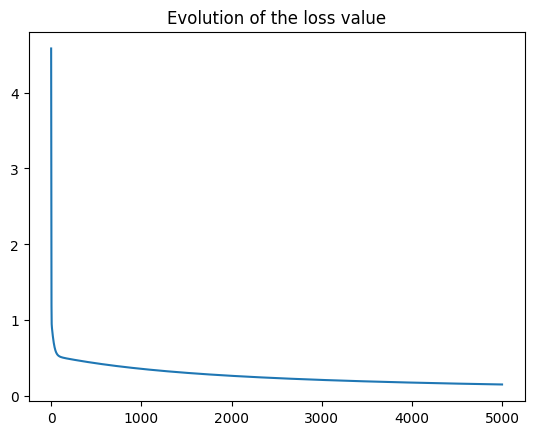

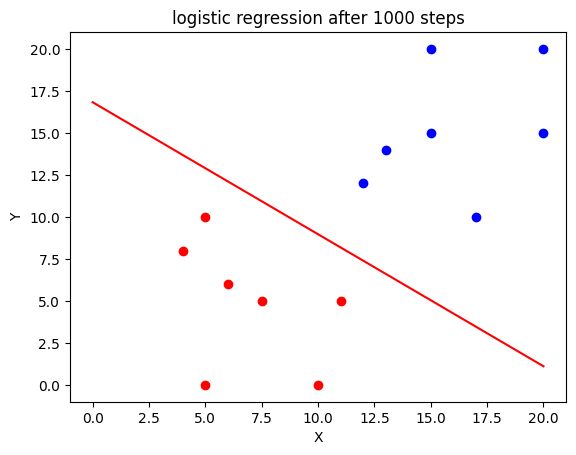

In [49]:
num_epochs = 5000
losses = np.zeros(num_epochs)
model = LogReg(D_in, D_out)
learning_rate = 0.01

# The loss
crit = th.nn.BCELoss()  # We are using the Binary Cross Entropy Loss here to shake things up
# The optimizer
Opti = th.optim.SGD(model.parameters(),lr=learning_rate) # We are using SGD again

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = crit(outputs, Y)
    losses[epoch] = loss
    # Backward pass and optimization
    Opti.zero_grad()
    loss.backward()
    Opti.step()

    # Print loss every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.10f}")

plt.figure(1)
plt.plot(losses)
plt.title('Evolution of the loss value')


# Plot the fitted line
plt.figure(2)
xs = th.linspace(0, 20, 2)

b = model.linear.bias.data.numpy()
w0, w1 = model.linear.weight.data.numpy().squeeze()
plt.plot(xs, -(w0*xs + b)/w1, 'r')

plt.scatter(ST1[0],ST1[1],color='b')
plt.scatter(ST2[0],ST2[1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('logistic regression after %i steps' %Nepoch)
plt.show()

It is better to visualize the evolution of the loss function: to be sure that everything went well. The idea is to store the loss values in a numpy array and then to plot it. 

**TODO:** Modify the code above to do that. 

## Explore the "solution" 

Here, we look at the different wrapping steps: 
- The model is a set of modules
- A Linear module is a matrix of weights along with a bias vector. They are parameters.
- A Parameter wrap a tensor
- A tensor can be casted as a numpy array


In [50]:
mod = model
print(type(mod))
print(type(mod.linear.bias))
print(type(mod.linear.bias.data))
print(type(mod.linear.bias.data.numpy()))


<class '__main__.LogReg'>
<class 'torch.nn.parameter.Parameter'>
<class 'torch.Tensor'>
<class 'numpy.ndarray'>


We can look at the parameters: 

In [51]:
print(mod.linear.bias.data.view(1,1))
print(mod.linear.weight.data)

tensor([[-4.3641]])
tensor([[0.2038, 0.2593]])


## Impact of the learning rate 

Now, we will use the same model trained with a different learning rate. The training process restarts from scratch. We need to therefore to re-create the model and the associated optimizer. 

In [55]:
D_in = 2
D_out = 1
X = th.from_numpy(Xstudents.astype(np.float32)).transpose(1,0)
Y = th.from_numpy(Ystudents.astype(np.float32)).unsqueeze(1)


In [68]:
model = th.nn.Sequential(
    th.nn.Linear(D_in, D_out),
    th.nn.Sigmoid()    
)
crit = th.nn.BCELoss()

We now have the same model as before, randomly initialized. We train this same model with a different learning rate, a larger one. 

- Run the training with the same number of epochs and compare the loss value we get at the end
- Do you think we can reach the same value with the learning rate of 1e-2, but with a longer training ? 
- Try the same thing with a learning rate of 0.5, what do you observe ? 



Final loss: 0.0850225911


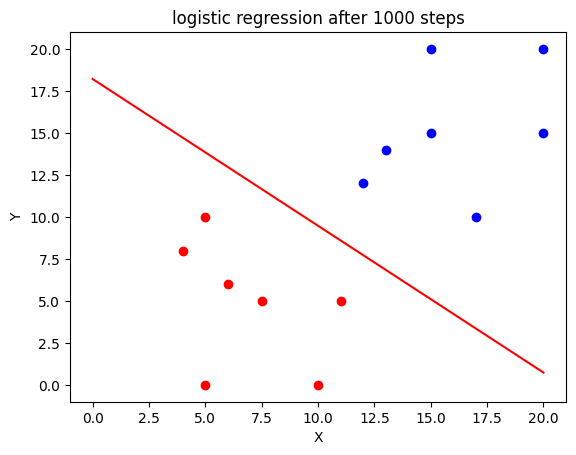

In [69]:
learning_rate = 1e-1
optimizer = th.optim.SGD(model.parameters(), lr=learning_rate) 
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = crit(outputs, Y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Compute the final loss
final_loss = crit(model(X), Y)
print(f"Final loss: {final_loss.item():.10f}")

# We have a Final loss value far smaller than the one before

# Plot the fitted line
plt.figure(2)
xs = th.linspace(0, 20, 2)

b = model[0].bias.data.numpy()
w0, w1 = model[0].weight.data.numpy().squeeze()
plt.plot(xs, -(w0*xs + b)/w1, 'r')

plt.scatter(ST1[0],ST1[1],color='b')
plt.scatter(ST2[0],ST2[1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('logistic regression after %i steps' %Nepoch)
plt.show()

In [72]:
model = th.nn.Sequential(
    th.nn.Linear(D_in, D_out),
    th.nn.Sigmoid()    
)
crit = th.nn.BCELoss()

Final loss: 0.1517554820


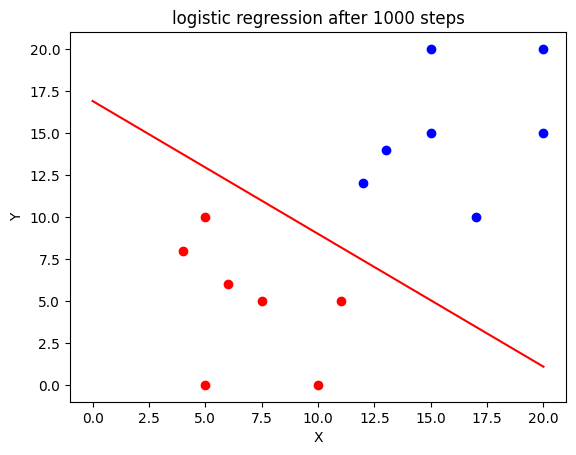

In [73]:
optimizer = th.optim.SGD(model.parameters(), lr=1e-2)
num_epochs = 5000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    outputs = model(X)
    loss = crit(outputs, Y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Compute the final loss
final_loss = crit(model(X), Y)
print(f"Final loss: {final_loss.item():.10f}")

# Even with a learning rate of a tenth of before we attain a similar final loss value 
# by training 5 times as much. We just took smaller steps for each correction

# Plot the fitted line
plt.figure(2)
xs = th.linspace(0, 20, 2)

b = model[0].bias.data.numpy()
w0, w1 = model[0].weight.data.numpy().squeeze()
plt.plot(xs, -(w0*xs + b)/w1, 'r')

plt.scatter(ST1[0],ST1[1],color='b')
plt.scatter(ST2[0],ST2[1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('logistic regression after %i steps' %Nepoch)
plt.show()

In [70]:
model = th.nn.Sequential(
    th.nn.Linear(D_in, D_out),
    th.nn.Sigmoid()    
)
crit = th.nn.BCELoss()

Final loss: 50.0000000000


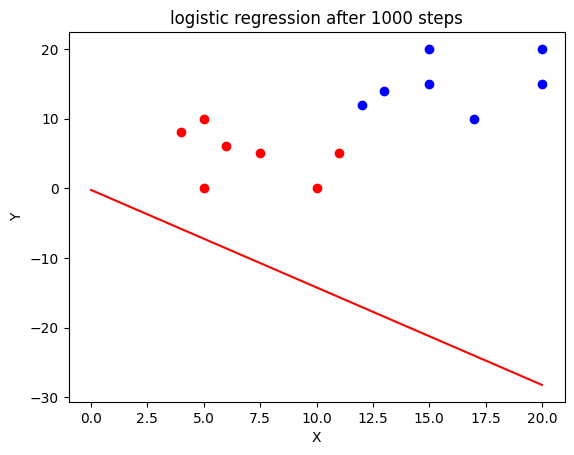

In [71]:
optimizer = th.optim.SGD(model.parameters(), lr=5)

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    outputs = model(X)
    loss = crit(outputs, Y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Compute the final loss
final_loss = crit(model(X), Y)
print(f"Final loss: {final_loss.item():.10f}")

# With a learning rate too big, we overshoot and the loss value starts to diverge. The regression is not good at all

# Plot the fitted line
plt.figure(2)
xs = th.linspace(0, 20, 2)

b = model[0].bias.data.numpy()
w0, w1 = model[0].weight.data.numpy().squeeze()
plt.plot(xs, -(w0*xs + b)/w1, 'r')

plt.scatter(ST1[0],ST1[1],color='b')
plt.scatter(ST2[0],ST2[1],color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('logistic regression after %i steps' %Nepoch)
plt.show()